# Bike share dataset

![Bikeshare photo](https://d21xlh2maitm24.cloudfront.net/wdc/CaBi-return2.jpg?mtime=20170103131208)

## Introducción
En la presente libreta de Jupyter se realiza un análisis de datos acerca de ciertas condiciones que pueden influir en la cantidad de bicicletas propiedad de la compañía **Capital Bikeshare** que son rentadas por usuarios.

### Objetivos
* Representar de manera visual la relación que existe entre la cantidad de bicicletas rentadas y las diferentes condiciones climáticas, día, mes, estación del año, entre otras.
* Determinar si existe correlación entre las condiciones climáticas y la cantidad de bicicletas rentadas.
* Tratar de predecir cuántas bicicletas serán rentadas para una temperatura dada.
* Tratar de predecir cuántas bicicletas serán rentadas para una velocidad el viento dada.
* Tratar de predecir cuántas bicicletas serán rentadas para una humedad relativa dada.
* Tratar de establecer una relación entre las estaciones origen y destino en las trayectorias de los usuarios.

### Acerca de

Para obtener más detalles del Data Set consulte la [descripción de los datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

Para saber más acerca de la compañía de renta de bicicletas que proporcionó los datos, puede consultar la página de [Capital Bikeshare](https://www.capitalbikeshare.com/).

Esta libreta fue realizado por: **Miguel Romero Vadés**.

------------------------------------------


### En la siguiente celda se importan las librerías que serán utilizadas.

In [96]:
import requests
from zipfile import ZipFile
import os.path
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


### A continuación se baja el conjunto de datos desde el repositorio de la **UCI**, se extrae el archivo zip y se leen los archivos en un dataframe de _pandas_.
### El archivo days.csv representa en cada registro los datos de un día determinado; mientras que el archivo hour.csv representa en cada registro los datos de una hora determinada.
### Ambos archivos comprenden la misma ventada de tiempo de dos años.

In [97]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
req = requests.get(url)
file_name = "Bike-Sharing-Dataset.zip"

if not os.path.isfile("./" + file_name):
    with open(file_name, "wb") as my_file:
        my_file.write(req.content)

    with ZipFile(file_name) as my_zip:
        my_zip.printdir()
        my_zip.extractall()
        
        
bikes_day = pd.read_csv("day.csv", index_col=0)
bikes_hour = pd.read_csv("hour.csv", index_col=0)

### Empezamos por ver qué forma tiene el dataset days.csv.

In [98]:
print("Dimensiones del dataset bikes_day:", bikes_day.shape)
bikes_day.head()

Dimensiones del dataset bikes_day: (731, 15)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Se crea una copia del dataframe bikes_day para reemplazar los valores númericos por sus correspondientes cadenas en las columnas que representan datos cualitativos. Esto se hace para que en las gráficas, las etiquetas sean cadenas y no números. <br>Cabe mencionar que el dataframe original no es modificado por esta operación.


In [99]:
bikes_day_copy = bikes_day.copy()
bikes_day_copy['weathersit'] = bikes_day['weathersit'].replace([1,2,3,4], 
["Despejado", "Neblina", "Poca lluvia/nieve", "Fuerte lluvia/nieve"])
bikes_day_copy['workingday'] = bikes_day['workingday'].replace([0,1], ["Inhábil", "Hábil"])
bikes_day_copy['weekday'] = bikes_day['weekday'].replace([0,1,2,3,4,5,6], 
["Domingo", "Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado"])
bikes_day_copy['holiday'] = bikes_day['holiday'].replace([0,1], ["No Festivo", "Festivo"])
bikes_day_copy['mnth'] = bikes_day['mnth'].replace([i for i in range(1,13)], 
["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", 
 "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])
bikes_day_copy['yr'] = bikes_day['yr'].replace([0,1], [2011, 2012])
bikes_day_copy['season'] = bikes_day['season'].replace([1,2,3,4], 
["Invierno", "Primavera", "Verano", "Otoño"])

### A continuación se presenta un conjunto de gráficas de barras en donde se relacionan algunos atributos cualitativos con la cantidad de bicicletas rentadas.

Text(0.5, 0, 'Condición climática')

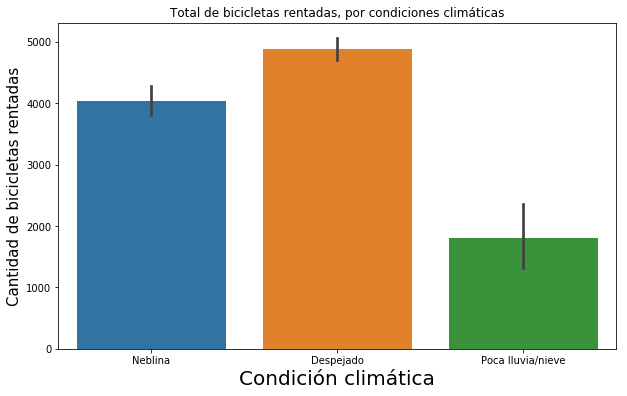

In [101]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por condiciones climáticas')
#sns.barplot(x=estado_tiempo, y=bikes_day_2['cnt'])
sns.barplot(x=bikes_day_copy['weathersit'], y=bikes_day_copy['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas', fontsize=15)
plt.xlabel('Condición climática', fontsize=20)

Text(0.5, 0, 'Estación del año')

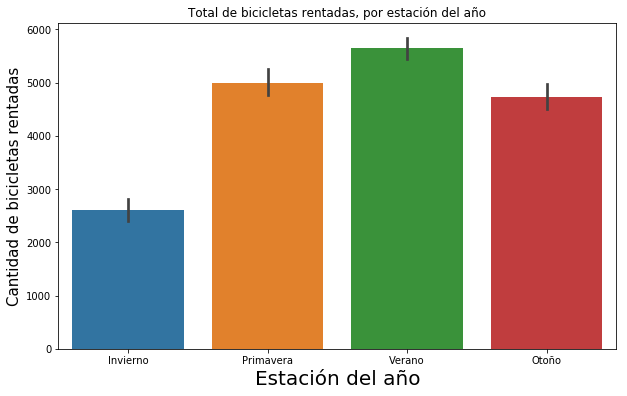

In [102]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por estación del año')
sns.barplot(x=bikes_day_copy['season'], y=bikes_day_copy['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas', fontsize=15)
plt.xlabel('Estación del año', fontsize=20)

Text(0.5, 0, 'Mes del año')

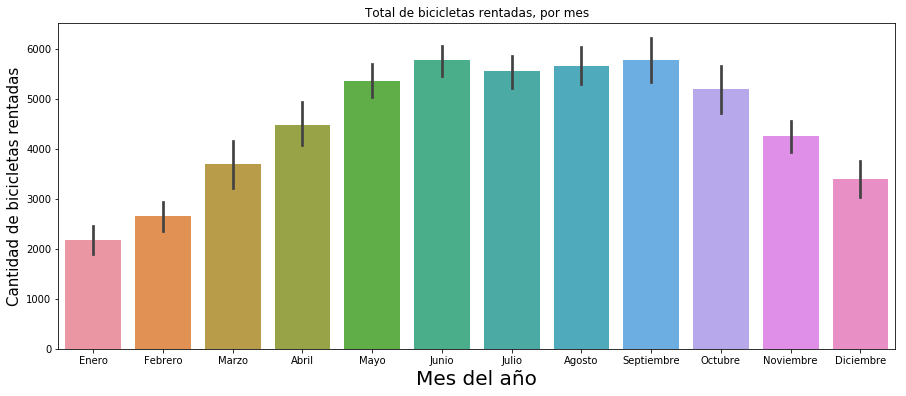

In [103]:
plt.figure(figsize=(15,6))
plt.title('Total de bicicletas rentadas, por mes')
sns.barplot(x=bikes_day_copy['mnth'], y=bikes_day_copy['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas', fontsize=15)
plt.xlabel('Mes del año', fontsize=20)

Text(0.5, 0, 'Día de la semana')

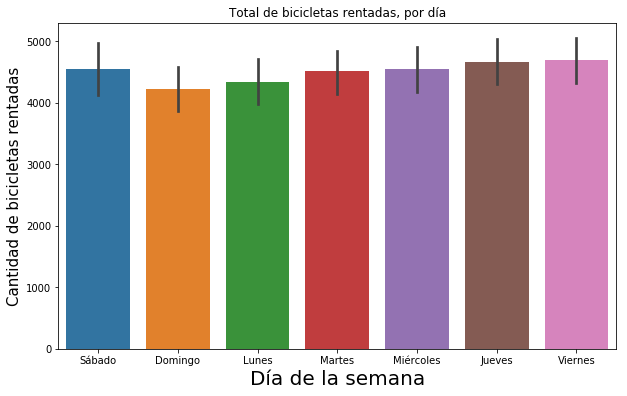

In [104]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por día')
sns.barplot(x=bikes_day_copy['weekday'], y=bikes_day_copy['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas', fontsize=15)
plt.xlabel('Día de la semana', fontsize=20)

Text(0.5, 0, 'Tipo de día')

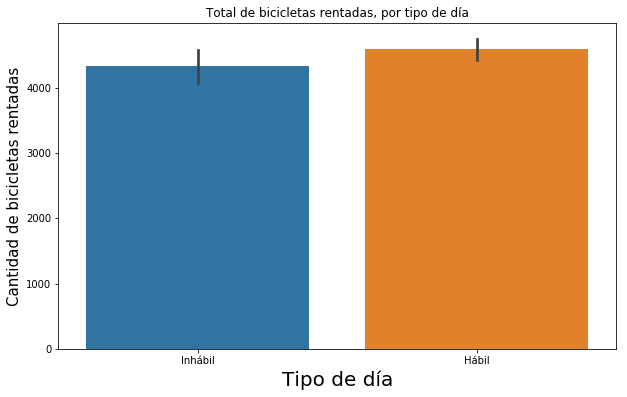

In [105]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por tipo de día')
sns.barplot(x=bikes_day_copy['workingday'], y=bikes_day_copy['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas', fontsize=15)
plt.xlabel('Tipo de día', fontsize=20)

Text(0.5, 0, 'Tipo de día')

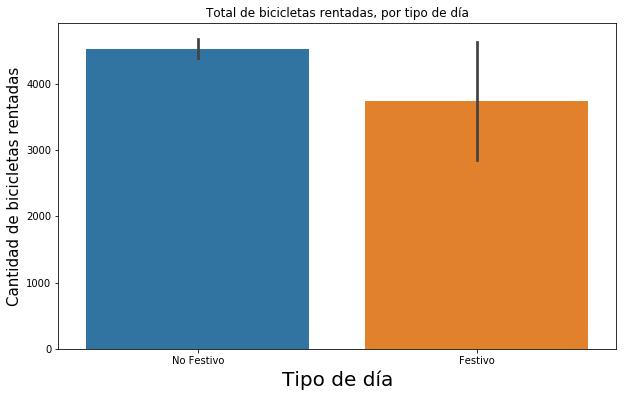

In [106]:
plt.figure(figsize=(10,6))
plt.title('Total de bicicletas rentadas, por tipo de día')
sns.barplot(x=bikes_day_copy['holiday'], y=bikes_day_copy['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas', fontsize=15)
plt.xlabel('Tipo de día', fontsize=20)

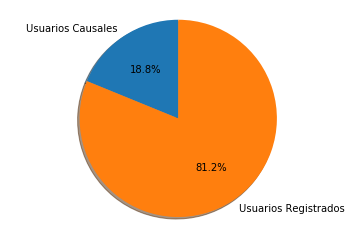

In [107]:
suma_causales = bikes_day['casual'].sum()
suma_registrados = bikes_day['registered'].sum()
suma_total = bikes_day['cnt'].sum()

frac_casuales = suma_causales / suma_total
frac_registrados = suma_registrados / suma_total

labels = 'Usuarios Causales', 'Usuarios Registrados'
sizes = [frac_casuales, frac_registrados]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Ahora se trabajará con el dataset bikes_hour. Veamos qué forma tiene.

In [108]:
print("Dimensiones del dataset bikes_hour:", bikes_hour.shape)
bikes_hour.head()

Dimensiones del dataset bikes_hour: (17379, 16)


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Ahora se graficará la cantidad de bicicletas rentadas por hora del día.

Text(0.5, 0, 'Hora del día')

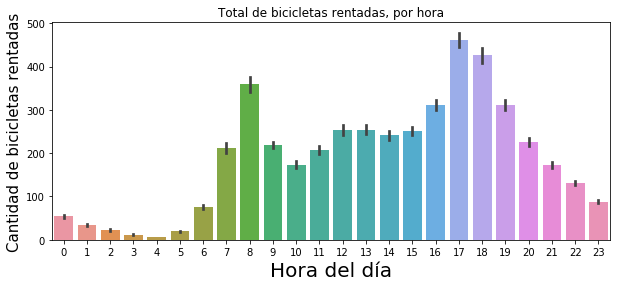

In [111]:
plt.figure(figsize=(10,4))
plt.title('Total de bicicletas rentadas, por hora')
sns.barplot(x=bikes_hour['hr'], y=bikes_hour['cnt'])
plt.ylabel('Cantidad de bicicletas rentadas', fontsize=15)
plt.xlabel('Hora del día', fontsize=20)

### Para mostrar la relación entre la cantidad de bicicletas rentadas y los atributos cuantitativos, éstos se tiene que **desnormalizar**.

In [112]:
bikes_hour_copy = bikes_hour.copy()
bikes_hour_copy['temp'] = bikes_hour['temp'].apply(lambda t: 47*t - 8)
bikes_hour_copy['hum'] = bikes_hour['hum'].apply(lambda t: 100*t)
bikes_hour_copy['windspeed'] = bikes_hour['windspeed'].apply(lambda t: 67*t)

### A continuación se obtiene los valores únicos de temperatura.

In [113]:
unique_temp = bikes_hour_copy['temp'].unique()
unique_temp

array([ 3.28,  2.34,  1.4 ,  7.04,  9.86,  8.92, 11.74, 13.62, 12.68,
       10.8 ,  7.98,  6.1 ,  4.22, -0.48, -1.42,  0.46, -2.36,  5.16,
       -3.3 , -4.24, -5.18, -6.12, -7.06, 16.44, 18.32, 19.26, 20.2 ,
       14.56, 17.38, 15.5 , 23.02, 22.08, 21.14, 23.96, 24.9 , 26.78,
       27.72, 25.84, 28.66, 30.54, 29.6 , 32.42, 33.36, 34.3 , 31.48,
       35.24, 36.18, 37.12, 38.06, 39.  ])

### Ahora se calcula el promedio de bicicletas rentadas para una temperatura dada.

In [115]:
cnt_promedio = []
for temp in unique_temp:
    cnt_promedio.append( bikes_hour['cnt'][ bikes_hour_copy['temp'] == temp ].mean() )
    
cnt_por_temp = pd.Series(cnt_promedio)

## Empecemos con el Aprendizaje Supervisado realizando Regresión Lineal.

### Para ver si existe correlación lineal entre la temperatura y la cantidad de bicicletas rentadas, realizamos una gráfica de regresión lineal.

Text(0.5, 0, 'Temperatura (°C)')

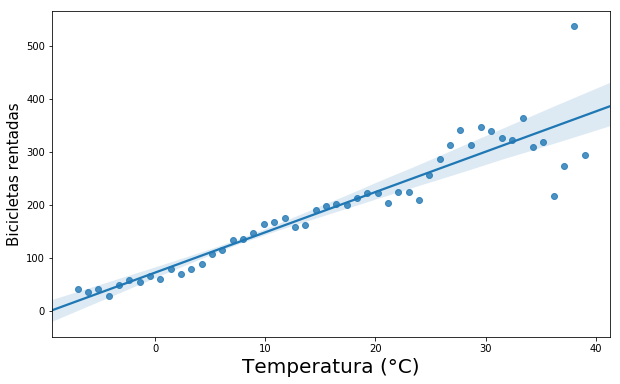

In [132]:
plt.figure(figsize=(10,6))
sns.regplot(x=unique_temp, y=cnt_por_temp)
plt.ylabel('Bicicletas rentadas', fontsize=15)
plt.xlabel('Temperatura (°C)', fontsize=20)

### Se define la función que determina los coeficientes de la regresión lineal, mediante la ecuación normal.

In [133]:
def ecuacion_normal(x, y):
    """
    Encuentra la solución de mínimos cuadrados a partir de la ecuación normal

    @param x: ndarray de dimension [T, n + 1] con los datos de entrada
    @param y: ndarray de dimension [T, 1] con los datos de salida
    
    @return w: ndarray de dimension [n + 1, T] con los parametros encontrados
    """
    
    # Esta función en realidad es una sola linea de código
    # return --inserta aqui tu código--
    
    theta = np.linalg.inv(x.T@x)@x.T@y
    
    return theta
    

### Ahora se calculan los coeficientes de la ecuación lineal con los datos de temperatura y cantidad de bibicletas rentadas.

In [134]:
x = np.c_[np.ones_like(unique_temp), unique_temp]
theta_n = ecuacion_normal(x, cnt_por_temp)
theta_n

array([72.59955662,  7.60418594])

### A continuación se va a estimar la cantidad de bicicletas rentadas para los valores de 4 °C y 24 °C. Los valores obtenidos son truncados a enteros.

In [135]:
x_estimar = np.array([4,24]).reshape(-1,1)
x_aux = np.c_[np.ones_like(x_estimar), x_estimar]
y_estimado = x_aux @ theta_n
print("Para 4 °C -> %i bicicletas. \nPara 24 °C -> %i bicicletas." %(y_estimado[0], y_estimado[1]) )

Para 4 °C -> 103 bicicletas. 
Para 24 °C -> 255 bicicletas.


### Ahora heremos lo mismo con las columnas de humedad y velocidad del viento.

In [136]:
unique_hum = bikes_hour_copy['hum'].unique()
unique_hum

array([ 81.,  80.,  75.,  86.,  76.,  77.,  72.,  82.,  88.,  87.,  94.,
       100.,  71.,  66.,  57.,  46.,  42.,  39.,  44.,  47.,  50.,  43.,
        40.,  35.,  30.,  32.,  64.,  69.,  55.,  59.,  63.,  68.,  74.,
        51.,  56.,  52.,  49.,  48.,  37.,  33.,  28.,  38.,  36.,  93.,
        29.,  53.,  34.,  54.,  41.,  45.,  92.,  62.,  58.,  61.,  60.,
        65.,  70.,  27.,  21.,  25.,  26.,  31.,  73.,  24.,  23.,  22.,
        19.,  15.,  67.,  10.,   8.,  12.,  14.,  13.,  17.,  16.,  18.,
        96.,  20.,  85.,   0.,  90.,  83.,  78.,  84.,  89.,  79.,  97.,
        91.])

In [137]:
cnt_promedio = []
for hum in unique_hum:
    cnt_promedio.append( bikes_hour['cnt'][ bikes_hour_copy['hum'] == hum ].mean() )
    
cnt_por_hum = pd.Series(cnt_promedio)

Text(0.5, 0, 'Humedad')

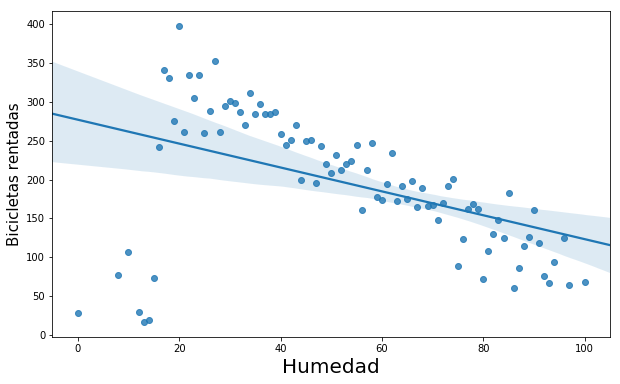

In [138]:
plt.figure(figsize=(10,6))
#sns.regplot(x=bikes_hour_copy['hum'], y=bikes_hour_copy['cnt'])
sns.regplot(x=unique_hum, y=cnt_por_hum)
plt.ylabel('Bicicletas rentadas', fontsize=15)
plt.xlabel('Humedad', fontsize=20)

In [139]:
x = np.c_[np.ones_like(unique_hum), unique_hum]
theta_n = ecuacion_normal(x, cnt_por_hum)
theta_n

array([277.00958906,  -1.53672055])

### Ahora estimamos los valores de bicicletas rentadas para los valores de 10 % y 100 % de humedad relativa.

In [170]:
x_estimar = np.array([10,100]).reshape(-1,1)
x_aux = np.c_[np.ones_like(x_estimar), x_estimar]
y_estimado = x_aux @ theta_n
print("Para 10%% -> %i bicicletas.\nPara 100%% -> %i bicicletas"  %(y_estimado[0], y_estimado[1]))

Para 10% -> 201 bicicletas.
Para 100% -> 77 bicicletas


In [157]:
unique_viento = bikes_hour_copy['windspeed'].unique()
unique_viento

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 54.002 , 56.9969,
       55.9986, 47.9988])

In [158]:
cnt_promedio = []
for viento in unique_viento:
    cnt_promedio.append( bikes_hour['cnt'][ bikes_hour_copy['windspeed'] == viento ].mean() )
    
cnt_por_viento = pd.Series(cnt_promedio)

Text(0.5, 0, 'Velocidad del viento')

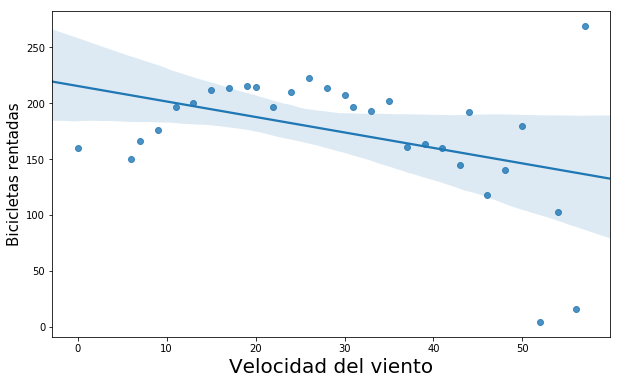

In [159]:
plt.figure(figsize=(10,6))
#sns.regplot(x=bikes_hour_copy['windspeed'], y=bikes_hour_copy['cnt'])
sns.regplot(x=unique_viento, y=cnt_por_viento)
plt.ylabel('Bicicletas rentadas', fontsize=15)
plt.xlabel('Velocidad del viento', fontsize=20)

In [160]:
x = np.c_[np.ones_like(unique_viento), unique_viento]
theta_n = ecuacion_normal(x, cnt_por_viento)
theta_n

array([215.5960658 ,  -1.38262394])

### Ahora se estimamos la cantidad de bicicletas rentadas para velocidades del viento de 10 y 100 km/h.

In [164]:
x_estimar = np.array([10,100]).reshape(-1,1)
x_aux = np.c_[np.ones_like(x_estimar), x_estimar]
y_estimado = x_aux @ theta_n
print("Para 10 km/h -> %i bicicletas.\nPara 100 km/h -> %i bicicletas." %(y_estimado[0], y_estimado[1]))

Para 10 km/h -> 201 bicicletas.
Para 100 km/h -> 77 bicicletas.


### Ahora se explora otro dataset que contiene información sobre los viajes que realizan los usuarios del servicio de renta de bicicletas.

In [165]:
trip_data = pd.read_csv("201909-capitalbikeshare-tripdata.csv")
print("Dimensiones del dataset trip_data:", trip_data.shape)
trip_data.head()

Dimensiones del dataset trip_data: (360225, 9)


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,207,2019-09-01 00:00:27,2019-09-01 00:03:54,31246,M St & Pennsylvania Ave NW,31128,23rd & M St NW,W21128,Member
1,726,2019-09-01 00:00:46,2019-09-01 00:12:52,31124,14th & Irving St NW,31116,California St & Florida Ave NW,W01208,Member
2,4401,2019-09-01 00:00:48,2019-09-01 01:14:10,31129,15th St & Pennsylvania Ave NW,31277,17th & G St NW,W23690,Casual
3,388,2019-09-01 00:01:01,2019-09-01 00:07:30,31648,Potomac Ave & Half St SW,31609,Maine Ave & 7th St SW,W20449,Member
4,537,2019-09-01 00:01:09,2019-09-01 00:10:07,31200,Massachusetts Ave & Dupont Circle NW,31229,New Hampshire Ave & T St NW,W20206,Member


## Ahora tratemos de hacer algo de Aprendizaje No Supervisado.
### Veamos si podemos establecer una relación entre las estaciones origen y las estaciones destino de los usuarios.

Text(0.5, 0, 'Estación Origen')

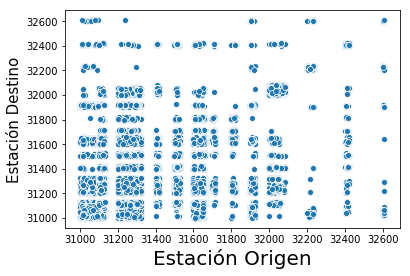

In [166]:
sns.scatterplot(x=trip_data['Start station number'], y=trip_data['End station number'], data=trip_data)
plt.ylabel('Estación Destino', fontsize=15)
plt.xlabel('Estación Origen', fontsize=20)

### A continuación se realiza el método del codito para determinar el número de clusters.

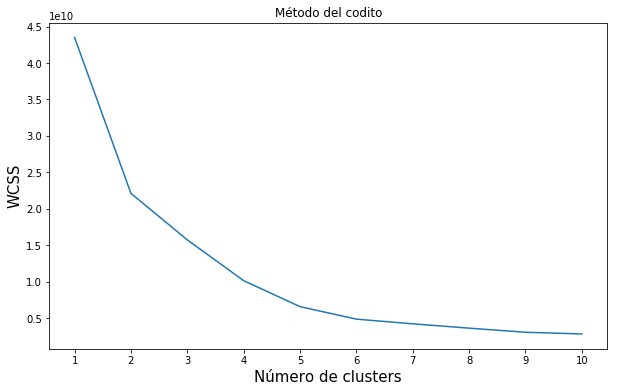

In [168]:
my_array = np.c_[trip_data['Start station number'], trip_data['End station number']]

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(my_array)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.xticks(np.arange(1, 11, 1.0))
plt.plot(range(1, 11), wcss)
plt.title('Método del codito')
plt.xlabel('Número de clusters', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.show()

### Se eligen 6 clusters para el algoritmo de k-means.

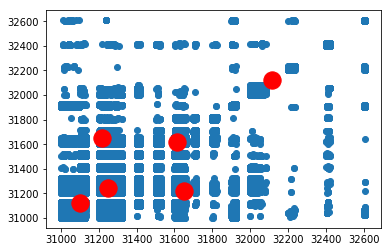

In [169]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(my_array)
plt.scatter(my_array[:,0], my_array[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

### No se nota una distinción entre los clusters. El algoritmo de k-medias no es el adecuado cuando existem muchos clusters. Se debe de experimentar con otros métodos.
